In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## load the dataset
df = pd.read_csv('week_purchases18-25.txt', delimiter='\t')  # Use the appropriate delimiter
df.head()

,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27.0,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,23:50:02,25/02/2001,Myself
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36.0,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,23:40:18,22/02/2001,Family
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38.0,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,08:37:27,21/02/2001,Family
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,20:17:16,25/02/2001,NaN
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25.0,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,21:12:49,22/02/2001,Myself


## 1 a) Check its size

In [3]:
print("Size:",df.size,"    rows/columns:",df.shape)

Size: 11824     rows/columns: (739, 16)


## 1 b) Get a summary of data

In [4]:
df.describe()

,Age,Product_ID,Price
count,444.000000,739.000000,739.000000
mean,43.182432,1039.170501,8.742368
std,14.657891,17.813339,2.879627
min,21.000000,1001.000000,5.990000
25%,32.000000,1024.000000,5.990000
50%,37.000000,1042.000000,7.990000
75%,58.000000,1056.000000,9.990000
max,75.000000,1062.000000,15.990000


## 1 c) Check which columns are numeric and which are categorical

In [5]:
df.dtypes

Username       object
TitleCli       object
Name           object
Address        object
Country        object
Gender         object
Age           float64
Favourites     object
Order_ID       object
Product_ID      int64
Style          object
Film_Title     object
Price         float64
PurchTime      object
PurchDate      object
Buy_for        object
dtype: object

## 1 d) Check for missing data by rows and by columns

In [6]:
df[df.isnull().any(axis=1)].head(3)

,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,20:17:16,25/02/2001,NaN
10,user_1080843,MISS,DORIS94941,59282111-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_70422638,1043,Comedy,Fetche la Vache,15.99,16:01:54,24/02/2001,NaN
12,user_1108073,MRS,DORIS85614,63812450-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_90818732,1062,Children,Bogus the Clown,5.99,23:52:26,23/02/2001,NaN


In [7]:
# Check for missing values and duplicates
total_missing = df.isna().sum().sum()
total_duplicates = df.duplicated().sum()

print("\nTotal Missing Values:", total_missing)
print("\nTotal duplicates:", total_duplicates)


Total Missing Values: 1475

Total duplicates: 0


## 2 a) Title Client

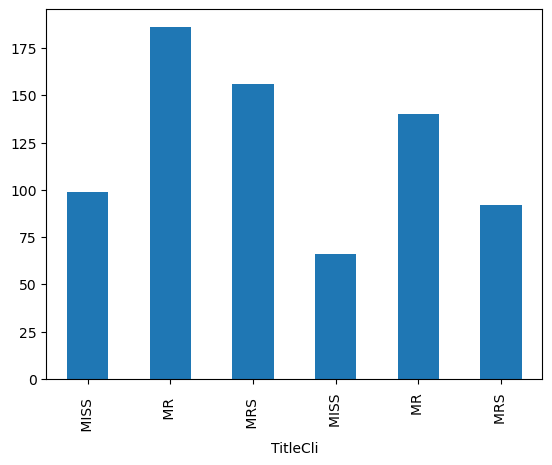

In [8]:
df['TitleCli'].value_counts().sort_index().plot.bar()
plt.show()

## 2 b) Gender

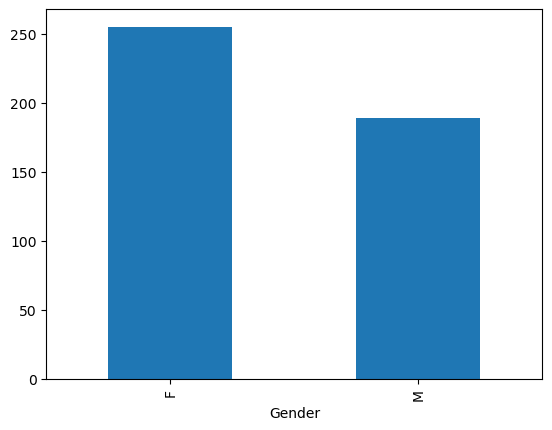

In [9]:
df["Gender"].value_counts().sort_index().plot.bar()
plt.show()

## 2 c) Country

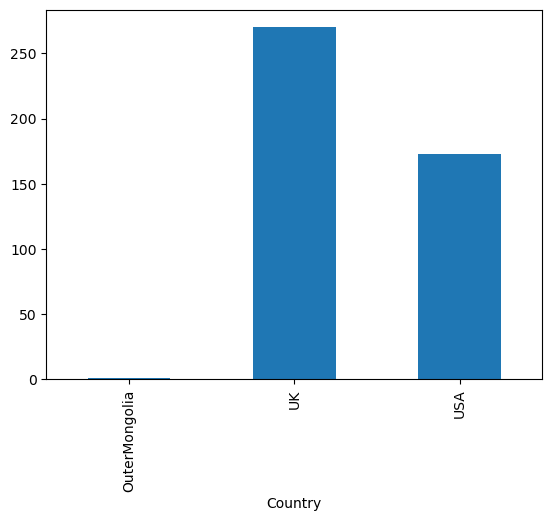

In [10]:
df["Country"].value_counts().sort_index().plot.bar()
plt.show()

## 3 d) Number of films sold by Style

In [16]:
df["Style"].value_counts().sort_index()

Style
Adventure     47
Children     151
Comedy       214
Drama         94
Horror        50
Musical       28
Sci-Fi        92
Western       63
Name: count, dtype: int64

## 3 e) Number of different Film_Title sold by Style

In [12]:
df.groupby('Style')["Film_Title"].nunique()

Style
Adventure     5
Children      3
Comedy       18
Drama         3
Horror        4
Musical       5
Sci-Fi       11
Western      12
Name: Film_Title, dtype: int64

## 3 f) Number of units sold for each Film_title / Style

In [13]:
df.groupby(['Style','Film_Title']).size().reset_index(name='Count')

,Style,Film_Title,Count
0,Adventure,Hard Rider,9
1,Adventure,LighteningBall,7
2,Adventure,The Fourth Man,10
3,Adventure,The IP File,11
4,Adventure,The Nine Rules,10
...,...,...,...
56,Western,The Finders,3
57,Western,The Nice the not so nice and the visually chal...,5
58,Western,The average six,4
59,Western,TheatreBus,17


## 3 g) Number of Customers who bought 1,2,3,4 DVDs

In [14]:
username_counts = df['Username'].value_counts()
grouped_counts = username_counts.groupby(username_counts).count()
result_df = pd.DataFrame({'Occurrences': grouped_counts.index, 'Number_of_Users': grouped_counts.values})
print(result_df)

   Occurrences  Number_of_Users
0            1              547
1            2               74
2            3               12
3            4                2


## 3 h) Create a summary table with Style/Uni_Vnd/Min_Prc/Max_Prk/Avg_Prck/DesvPad_Prd

In [15]:
summary_df = df.groupby('Style').agg(
    Uni_Vnd=pd.NamedAgg(column='Username', aggfunc='nunique'),
    Min_Prc=pd.NamedAgg(column='Price', aggfunc='min'),
    Max_Prc=pd.NamedAgg(column='Price', aggfunc='max'),
    Avg_Prc=pd.NamedAgg(column='Price', aggfunc='mean'),
    DesvPad_Prd=pd.NamedAgg(column='Price', aggfunc='std')
).reset_index()

print(summary_df)

       Style  Uni_Vnd  Min_Prc  Max_Prc    Avg_Prc  DesvPad_Prd
0  Adventure       45     7.99    12.99  11.607021     1.951067
1  Children       136     5.99     5.99   5.990000     0.000000
2     Comedy      206     5.99    15.99  10.027383     3.325602
3      Drama       89     7.99     7.99   7.990000     0.000000
4     Horror       48     5.99     8.99   7.310000     1.463013
5    Musical       28     5.99     5.99   5.990000     0.000000
6     Sci-Fi       89     5.99    15.99  10.685652     2.314499
7    Western       61     5.99    12.99   9.482063     2.422163


## 4 a) Day of the Week Purchase (Sunday, ..., Saturday)

In [20]:
df['PurchDate'] = pd.to_datetime(df['PurchDate'])
df['Day_of_Week'] = df['PurchDate'].dt.strftime('%A')

df.head()

,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for,Day_of_Week
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27.0,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,23:50:02,2001-02-25,Myself,Sunday
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36.0,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,23:40:18,2001-02-22,Family,Thursday
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38.0,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,08:37:27,2001-02-21,Family,Wednesday
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,20:17:16,2001-02-25,NaN,Sunday
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25.0,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,21:12:49,2001-02-22,Myself,Thursday


## 4 b) Purchase Period (morning, afternoon, evening)

In [27]:
df['PurchTime'] = pd.to_datetime(df['PurchTime'])

morning_start = pd.to_datetime('06:00:00').time()
afternoon_start = pd.to_datetime('12:00:00').time()
evening_start = pd.to_datetime('18:00:00').time()

def Purchase_Period(time):
    if morning_start <=time < afternoon_start:
        return 'morning'
    if afternoon_start <=time < evening_start:
        return 'afternoon'
    else:
        return ' evening'

df['Purchase_Period'] = df['PurchTime'].dt.time.apply(Purchase_Period)

df.head()

,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for,Day_of_Week,Purchase_Period
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27.0,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,2024-01-15 23:50:02,2001-02-25,Myself,Sunday,evening
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36.0,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,2024-01-15 23:40:18,2001-02-22,Family,Thursday,evening
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38.0,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,2024-01-15 08:37:27,2001-02-21,Family,Wednesday,morning
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,2024-01-15 20:17:16,2001-02-25,NaN,Sunday,evening
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25.0,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,2024-01-15 21:12:49,2001-02-22,Myself,Thursday,evening


## 4 c) Price range (low, medium, high)

In [29]:
def Prince_Range(price):
    if (price) < 8:
        return 'low'
    if(price) < 10:
        return 'medium'
    else:
        return 'high'
    
df['Price_Range'] = df['Price'].apply(Prince_Range)

df.head()

,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for,Day_of_Week,Purchase_Period,Price_Range
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27.0,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,2024-01-15 23:50:02,2001-02-25,Myself,Sunday,evening,medium
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36.0,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,2024-01-15 23:40:18,2001-02-22,Family,Thursday,evening,low
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38.0,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,2024-01-15 08:37:27,2001-02-21,Family,Wednesday,morning,low
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,2024-01-15 20:17:16,2001-02-25,NaN,Sunday,evening,medium
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25.0,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,2024-01-15 21:12:49,2001-02-22,Myself,Thursday,evening,high


## 4 d) Age Group (young, middle-aged, elderly)

In [33]:
def Age_Group(age):
    if (age < 35):
        return 'young'
    if(age < 55):
        return ' middle-aged'
    else:
        return ' elderly'

df['Age_Group'] = df['Age'].apply(Age_Group)

df.head()

,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for,Day_of_Week,Purchase_Period,Price_Range,Age_Group
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27.0,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,2024-01-15 23:50:02,2001-02-25,Myself,Sunday,evening,medium,young
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36.0,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,2024-01-15 23:40:18,2001-02-22,Family,Thursday,evening,low,middle-aged
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38.0,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,2024-01-15 08:37:27,2001-02-21,Family,Wednesday,morning,low,middle-aged
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,2024-01-15 20:17:16,2001-02-25,NaN,Sunday,evening,medium,elderly
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25.0,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,2024-01-15 21:12:49,2001-02-22,Myself,Thursday,evening,high,young


## 5 a) Purchases by day and by time of day

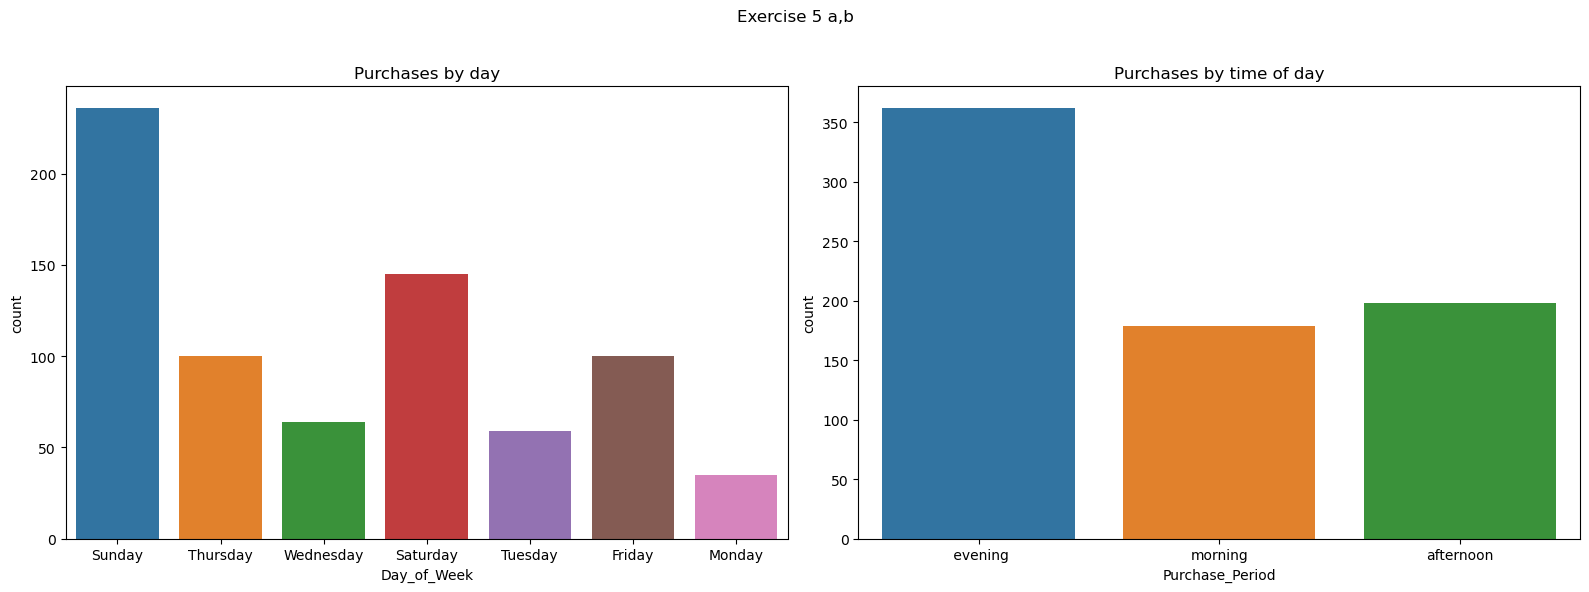

In [35]:
### Plot bar plots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Exercise 5 a,b')

sns.countplot(x='Day_of_Week', data=df, ax=axes[0])
axes[0].set_title('Purchases by day')

sns.countplot(x='Purchase_Period', data=df, ax=axes[1])
axes[1].set_title('Purchases by time of day')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

plt.show()

## 5 c) Price range vs. style | Age Group vs. style | Age Group vs. Price range

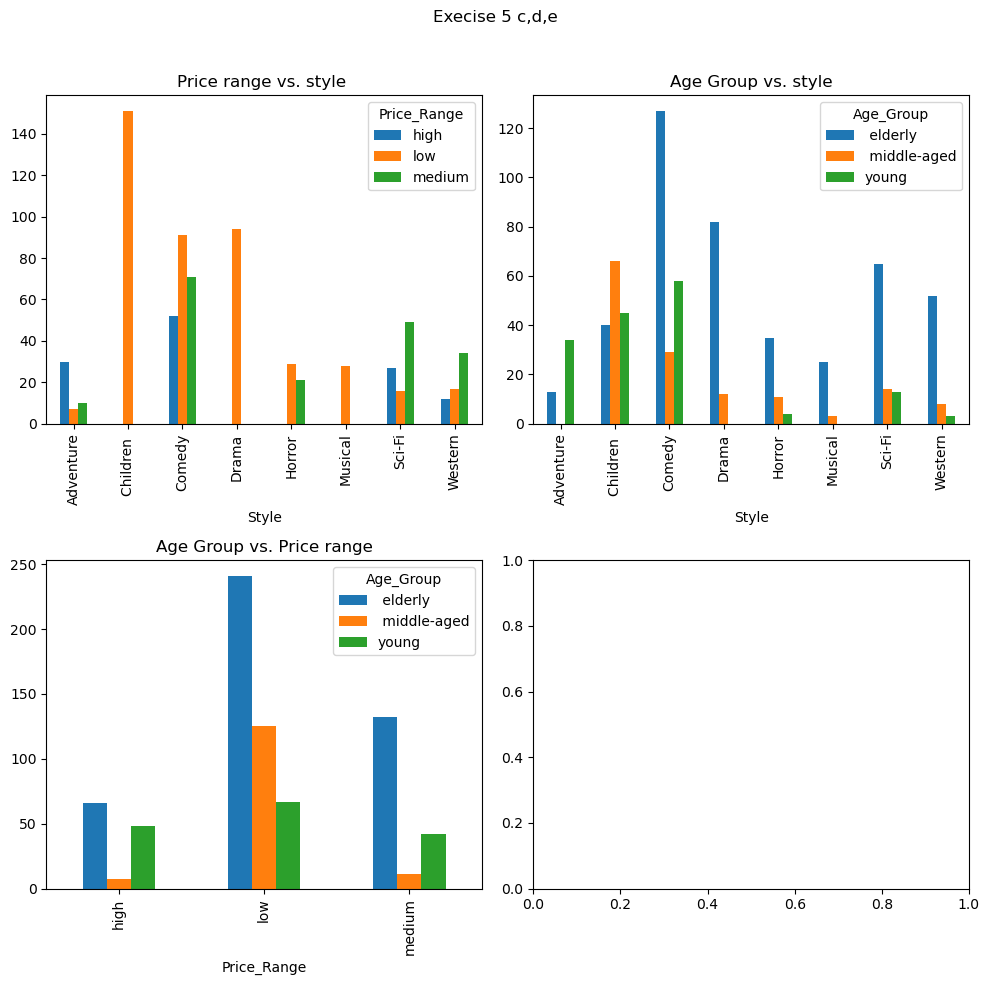

In [36]:
# Plot scatter plots for numerical variables vs charges
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Execise 5 c,d,e')

pd.crosstab(df['Style'],df['Price_Range']).plot(kind="bar",ax=axes[0,0])
axes[0,0].set_title('Price range vs. style ')

pd.crosstab(df['Style'],df['Age_Group']).plot(kind="bar",ax=axes[0,1])
axes[0,1].set_title('Age Group vs. style')

pd.crosstab(df['Price_Range'],df['Age_Group']).plot(kind="bar",ax=axes[1,0])
axes[1,0].set_title('Age Group vs. Price range')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()